# Compare runtime of matrix multiplication program with: C, Python, numpy.

Sinh viên thực hiện: Huỳnh Trí Nhân  
MSSV: 21120302  
Lớp: Lập trình Khoa học dữ liệu 21_21
  
Ngôn ngữ: Python, C++  
Kernel: Python 3.11.3  
Công cụ: Jupyter Notebook, Visual Studio Code  

# Nội dung bài làm gồm : 
1. Thư mục datas chứa những dữ liệu ma trận vuông được tạo ngẫu nhiên với kích thước từ (100-> 1000)
2. Thư mục results chứa những kết quả chương trình bẳng 3 ngôn ngữ C++, Python, Numpy *(Do kích thước quá lớn nên em xóa những kết quá kích thước lớn từ 300->1000)*
3. Thư mục times chứa thời gian chạy của từng phương pháp
4. Lab01.ipynb là file báo cáo bằng Jupyter Notebook
- Tạo hàm random matrix
- Nhân 2 ma trận bằng python
- Nhân 2 ma trận bằng numpy
- Sơ đồ so sánh thời gian chay của 3 phương pháp
- Nhận xét
6. matrix_mutiplication_program_with_CPP.cpp là file chương trình bằng C++


In [2]:
# Các thư viện sử dụng
import os
import numpy as np
import matplotlib.pyplot as plt
import time

len_matrix = [100,200,300,400,500,600,700,800,900,1000]

1. Sinh ma trận ngẫu nhiên và lưu vào thư mục

In [2]:


# Tạo ra đường dân thư mục datas nếu nó không tồn tại
if not os.path.exists('datas'):
    os.makedirs('datas')
    
for size in len_matrix:
    # Tạo ra ma trận ngẫu nhiên kích thước size*size
    # Ma trận 1 là số thực trong khoảng từ 0-1
    # Ma trận 2 là số nguyên trong khoảng từ 0-100
    matrix1 = np.random.rand(size, size)
    matrix2 = np.random.randint(low=0, high=100, size=(size, size))
    # Lưu ma trận vào file
    np.savetxt('datas/matrix_{}_1.txt'.format(size), matrix1, delimiter=',', fmt='%f')
    np.savetxt('datas/matrix_{}_2.txt'.format(size), matrix2, delimiter=',', fmt='%f')

2. Nhân 2 ma trận với Python và lưu vào thư mục results, times

In [4]:
# Tạo thư mục chưa thời gian chạy của thật toán
if not os.path.exists('times'):
    os.makedirs('times')
    
# Thư mục results chứa kết quả chạy của các thuật toán
if not os.path.exists('results'):
    os.makedirs('results')
    
times_python =[]
for size in len_matrix:

    # Đọc ma trận từ file
    matrix1 = np.loadtxt('datas/matrix_{}_1.txt'.format(size), delimiter=',')
    matrix2 = np.loadtxt('datas/matrix_{}_2.txt'.format(size), delimiter=',')
    # Thực hiện tính toán
    
    start = time.time()
    # Tạo ma trận kết quả với toàn phần từ 0
    result = [[0 for j in range(size)] for i in range(size)]
    # Nhân 2 ma trận bằng phương pháp dòng nhân cột truyền thông
    for i in range(size):
        for j in range(size):
            sum = 0
            for k in range(size):
                sum += matrix1[i][k] * matrix2[k][j]
            result[i][j] = sum      
              
    end = time.time()
    
    # Lưu kêt quả chạy vào file
    elapsed_time = (end - start) * 1000
    times_python.append(elapsed_time)
    np.savetxt('results/result_{}_python.txt'.format(size), result, delimiter=',', fmt='%f')

# Lưu thời gian chạy vào file
np.savetxt('times/time_python.txt', times_python, delimiter=',', fmt='%f')

3. Nhân 2 ma trận với numpy và lưu vào thư mục results, times

In [8]:
# Tạo thư mục chưa thời gian chạy của thật toán
if not os.path.exists('times'):
    os.makedirs('times')
    
# Thư mục results chứa kết quả chạy của các thuật toán
if not os.path.exists('results'):
    os.makedirs('results')
    
times_numpy =[]


for size in len_matrix:
    # Đọc ma trận từ file
    matrix1 = np.loadtxt('datas/matrix_{}_1.txt'.format(size), delimiter=',')
    matrix2 = np.loadtxt('datas/matrix_{}_2.txt'.format(size), delimiter=',')
    # Thực hiện tính toán
    
    start = time.time()
    # Nhân 2 ma trận bằng numpy
    result = np.dot(matrix1, matrix2)
    end = time.time()
    elapsed_time = (end - start) * 1000
    times_numpy.append(elapsed_time)
    np.savetxt('results/result_{}_numpy.txt'.format(size), result, delimiter=',', fmt='%f')

# Lưu thời gian chạy vào file
np.savetxt('times/time_numpy.txt', times_numpy, delimiter=',', fmt='%f')


4. Nhân 2 ma trận với C++ và lưu vào thư mục results, times  
Được đính kèm tại file: `matrix_mutilplication_program_with_CPP.cpp`

5. Vẽ biểu đồ so sánh thời gian chạy của từng chương trình bằng matplotlib

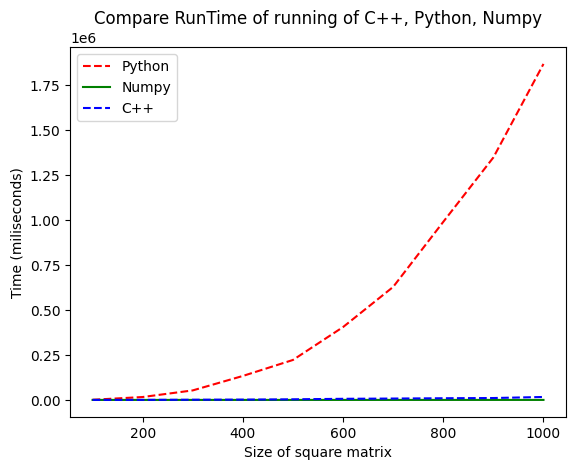

In [3]:
# Đọc thời gian chạy thuật toán trong thư mục times
times_python = np.loadtxt('times/time_python.txt', delimiter=',')
times_numpy = np.loadtxt('times/time_numpy.txt', delimiter=',')
times_cpp = np.loadtxt('times/time_cpp.txt', delimiter=',')

# Trục hoành là kích thước ma trận
# Trục tung là thời gian chạy milisecond
plt.xlabel('Size of square matrix')
plt.ylabel('Time (miliseconds)')
plt.title('Compare RunTime of running of C++, Python, Numpy')

plt.plot(len_matrix, times_python, label='Python', color='red', linestyle='dashed')
plt.plot(len_matrix, times_numpy, label='Numpy', color='green')
plt.plot(len_matrix, times_cpp, label='C++', color='blue', linestyle='dashed')

# Thêm chú thích cho từng đường thẳng
plt.legend()


6. Nhận xét kết quả

- Chương trình viết bằng Python **chậm nhất** do python là một ngôn ngữ thông dịch (interpreted language) và được biên dịch tại thời điểm chạy. Nên chương trình chạy chậm hơn so với các ngôn ngữ được biên dịch trước khi chạy như C++.
- Numpy **nhanh nhất** vì đây là thư viện tính toán khoa học cho python được viết bằng C và Fortran nên, 2 ngôn ngữ lập trình này có hiệu suất cao. Ngoài ra numpy cũng sử dụng các thư viện tối ưu hóa để thực hiện các phép trình trên ma trận.
- Chương trình viết bằng C++ **nhanh hơn** Python nhưng chậm hơn **chậm hơn** Numpy do được biên dịch trước vì đây là ngôn ngữ midle level nên khi chạy được dịch sang mã máy nhanh hơn rồi mới chạy chương trình, nhưng vì phải tự viết các hàm tính toán ma trận như vecto nên có tốc độ xử lý chậm hơn so với numpy.